<a href="https://colab.research.google.com/github/dmourlot89/MELI_challenge/blob/main/MELI_DSChallenge_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Explorar las ofertas relámpago, ¿qué insights puedes generar?

**Descripción:**

En conjunto con el desafío te compartimos un archivo llamado ofertas_relampago.csv, el cual posee información de los resultados de ofertas del tipo relampago para un periodo de tiempo y un país determinado.

Es decir, son ofertas que tienen una duración definida de algunas horas y un porcentaje de unidades (stock) comprometidas. El objetivo de este desafío es hacer un EDA sobre estos datos buscando insights
sobre este tipo de ofertas.

In [ ]:
# Import neccesary libraries and functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
url = 'https://raw.githubusercontent.com/dmourlot89/MELI_challenge/main/ofertas_relampago.csv'

or_df = pd.read_csv(url,parse_dates = [0,1,2], infer_datetime_format = True)

### Resumen

Datos Disponibles:
Ofertas Relampago para cada uno de los 61 dias transcurridos entre el 1 de junio y el 31 de julio de 2021.

**Principales insights encontrados:**

- Los **productos 'Farmaceuticos' **fueron por mucho los mas vendidos durante el periodo, representando por si solos el **55% de todas las unidades vendidas**!

- Si unimos la categoria de productos **'PHARMACEUTICS' a las de 'BEAUTY EQUIPMENT', 'HOME&DECOR' y 'COMPUTERS'**, tenemos una verdadera **distribucion de Pareto**, en la cual apenas un **11% de las categorias** agrupan aproximadamente el **80% de las unidades vendidas** durante el periodo. 

- Entre los **productos mas vendidos** destacan los de la categoria farmaceutica; **en especial las mascaras quirurgicas e industriales**, las cuales representan por si solas **mas del 50% de las ventas en el periodo **(!), los guantes desechables (5%) y los oximetros (3%). (Por supuesto, las mascaras quirurgicas e industriales son tambien, por mucho, las mas ofertadas.)

- **De los 10 productos mas ofertados en el periodo, solo tres entran en el top 10 de los mas vendidos**. Estos son las mascaras quirurgicas e industriales, los auriculares, y los led strips. (Muy mal les fue a los relojes.)

- A pesar de algunos altibajos, la **tendencia en el numero de ofertas relampago publicadas durante el periodo, fue ascendente**; con un pico notable en la segunda semana del mes de julio de 2021.

- Durante el **mes de julio**, hubo un **crecimiento del 67% en la cantidad de ofertas**, con respecto a las del mes de junio. 

- La cantidad de unidades de productos vendidas cayo consecutivamente durante las ultimas dos semanas de Julio, justo en en el mismo periodo que se registra un alza de la cantidad de ofertas publicadas. No obstante, la cantidad de unidades vendidas en el mes de julio fue mas de dos veces superior a la del mes anterior. 

- Mientras que las ofertas tendieron a ser mayores los jueves, viernes y sabados; el numero de unidades vendidas tendio a disminuir hacia el final de la semana (incluyendo viernes y sabados).

- El domingo no parece ser un buen dia para negocios.

## **Inspeccionar Dataset**

- Familiarizarse con las columnas y sus valores.
- Evaluar la calidad de los datos. 
- Asegurarse de que los tipos de datos sean los adecuados.

In [ ]:
print(f"Dataset shape: {or_df.shape}")

Dataset shape: (48746, 13)


In [ ]:
or_df.dtypes

OFFER_START_DATE                  datetime64[ns]
OFFER_START_DTTM             datetime64[ns, UTC]
OFFER_FINISH_DTTM            datetime64[ns, UTC]
OFFER_TYPE                                object
INVOLVED_STOCK                             int64
REMAINING_STOCK_AFTER_END                  int64
SOLD_AMOUNT                              float64
SOLD_QUANTITY                            float64
ORIGIN                                    object
SHIPPING_PAYMENT_TYPE                     object
DOM_DOMAIN_AGG1                           object
VERTICAL                                  object
DOMAIN_ID                                 object
dtype: object

In [ ]:
or_df[or_df['REMAINING_STOCK_AFTER_END']<=0].head(10)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
12,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 22:04:05+00:00,lightning_deal,9,0,12.32,9.0,A,none,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS
17,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 22:43:50+00:00,lightning_deal,5,0,16.23,5.0,NaN,none,APPAREL,APP & SPORTS,MLM-CLOTHING
24,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 18:03:56+00:00,lightning_deal,8,0,9.20,8.0,A,none,PETS FOOD,CPG,MLM-FISH_FOODS
26,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 00:04:41+00:00,lightning_deal,5,0,20.01,5.0,NaN,free_shipping,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-SHOWER_HEADS
27,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:46:03+00:00,lightning_deal,15,0,45.72,15.0,NaN,none,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-SHOWER_HEADS
29,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 14:20:21+00:00,lightning_deal,5,-4,12.18,9.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-SOAP_AND_DETERGENT_DISPENSERS


### Variables numericas

In [ ]:
or_df.describe(percentiles = [.1, .90])

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
10%,5.000000,1.000000,2.918000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
90%,30.000000,24.000000,86.990000,15.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


- Relativamente pocas unidades comprometidas (30 o menos, en el 90% de los casos).
- Montos de compra relativamente bajos (90 pesos o menos, en el 90%  de los casos, 8 pesos o menos en el 50% de ellos).
- 50% de las ventas son de 3 unidades o menos!

**NOTA:** Solo la mitad aproximadamente de las ofertas (filas) contienen informacion de cantidad vendida y monto de la compra.

### Variables Categoricas

Las siguientes columnas no parecen aportar mucha informacion, debido a que contienen muchos valores invalidos/inexistentes o porque contienen un unico valor.

In [ ]:
or_df['OFFER_TYPE'].value_counts()

lightning_deal    48746
Name: OFFER_TYPE, dtype: int64

In [ ]:
or_df['ORIGIN'].value_counts()

A    11316
Name: ORIGIN, dtype: int64

In [ ]:
or_df['SHIPPING_PAYMENT_TYPE'].value_counts()

free_shipping    26658
none             22088
Name: SHIPPING_PAYMENT_TYPE, dtype: int64

In [ ]:
vert = pd.DataFrame(or_df['VERTICAL'].value_counts())
total = or_df.shape[0]
vert['pctg'] = vert.iloc[:,0]/total
vert

,VERTICAL,pctg
APP & SPORTS,13241,0.271633
HOME & INDUSTRY,11011,0.225885
CE,8629,0.177020
BEAUTY & HEALTH,7150,0.146679
CPG,2714,0.055676
T & B,2624,0.053830
ACC,2573,0.052784
ENTERTAINMENT,525,0.010770
OTHERS,279,0.005724


- Las categorias 'APP & SPORTS' and 'HOME & INDUSTRY' representan el 50% de los verticales en oferta. (Agregando las categorias 'CE' y 'BEAUTY & HEALTH' se alcanza el 80 %.)

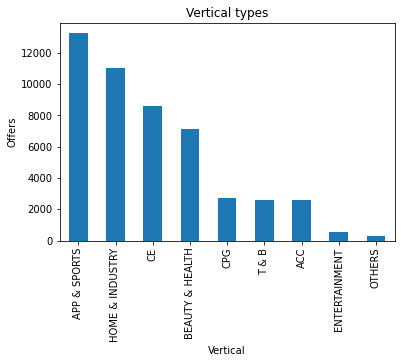

In [ ]:
or_df.VERTICAL.value_counts().plot(kind="bar",
                           title="Vertical types",
                           rot=90,
                           xlabel="Vertical",
                           ylabel="Offers")

In [ ]:
dom_domain = pd.DataFrame(or_df['DOM_DOMAIN_AGG1'].value_counts())
total = or_df.shape[0]
dom_domain['pctg'] = dom_domain.iloc[:,0]/total
dom_domain.head(10)

,DOM_DOMAIN_AGG1,pctg
HOME&DECOR,6742,0.138309
APPAREL ACCESORIES,4387,0.089997
APPAREL,3856,0.079104
COMPUTERS,3770,0.077340
SPORTS,3289,0.067472
PHARMACEUTICS,3035,0.062262
ELECTRONICS,3018,0.061913
PERSONAL CARE,3016,0.061872
MOBILE,1841,0.037767
AUTOPARTS,1696,0.034793


In [ ]:
or_df['DOMAIN_ID'].value_counts()

MLM-SURGICAL_AND_INDUSTRIAL_MASKS            1759
MLM-HEADPHONES                                761
MLM-LED_STRIPS                                518
MLM-SUNGLASSES                                472
MLM-VEHICLE_LED_BULBS                         454
                                             ... 
MLM-INSECT_KILLER_LIGHTS                        1
MLM-WATERING_CANS                               1
MLM-BASEBALL_AND_SOFTBALL_FIELDING_GLOVES       1
MLM-HABERDASHERY_BEADS                          1
MLM-ELECTRIC_SANDWICH_MAKERS                    1
Name: DOMAIN_ID, Length: 1266, dtype: int64

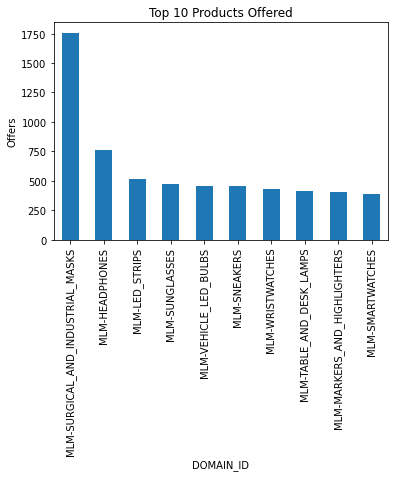

In [ ]:
or_df.DOMAIN_ID.value_counts()[:10].plot(kind="bar",
                           title="Top 10 Products Offered",
                           rot=90,
                           xlabel="DOMAIN_ID",
                           ylabel="Offers")

- Las mascarillas medicas e industriales son por mucho el producto mas ofertado, seguido de los audifonos (con dos veces menos ofertas).

### Variables Tipo Date

In [ ]:
print(or_df.OFFER_START_DATE.min())
print(or_df.OFFER_START_DATE.max())

2021-06-01 00:00:00
2021-07-31 00:00:00


In [ ]:
or_df.OFFER_START_DATE.unique().shape

(61,)

Tenemos ofertas para cada uno de los 61 dias transcurridos entre el 1 de junio y el 31 de julio de 2021.

## **Transformaciones**

Crear un dataframe de trabajo, realizando modificaciones a nuestro dataset original.


In [ ]:
working_df = or_df.copy()

- Eliminar columnas que no aportan informacion

In [ ]:
working_df.drop(labels = ['OFFER_TYPE', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE'], axis = 1, inplace = True)

In [ ]:
print(working_df.shape)
working_df.head()

(48746, 10)


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,4,-2,4.72,6.0,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,NaN,NaN,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,15,12,10.73,3.0,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,15,13,7.03,2.0,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,15,0,39.65,15.0,COMPUTERS,CE,MLM-HEADPHONES


- Calcular valores faltantes de SOLD_QUANTITY = (INVOLVED_STOCK - REMAINING_STOCK_AFTER_END)

In [ ]:
working_df.SOLD_QUANTITY.fillna(working_df.INVOLVED_STOCK - working_df.REMAINING_STOCK_AFTER_END, inplace = True)

In [ ]:
working_df[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_QUANTITY']].head(10)

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_QUANTITY
0,4,-2,6.0
1,5,5,0.0
2,15,12,3.0
3,15,13,2.0
4,15,0,15.0
5,23,23,0.0
6,10,10,0.0
7,10,-1,11.0
8,10,-1,11.0
9,15,13,2.0


In [ ]:
working_df[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_QUANTITY']].count()

INVOLVED_STOCK               48746
REMAINING_STOCK_AFTER_END    48746
SOLD_QUANTITY                48746
dtype: int64

- Crear columnas 'MONTH', 'DAY', 'WEEK', 'DAY_IN_WEEK'

In [ ]:
month_mapping = {6: 'June', 7: 'July'}
working_df['MONTH'] = working_df.OFFER_START_DATE.dt.month.map(month_mapping)   
working_df['WEEK'] = working_df.OFFER_START_DATE.dt.week
working_df['DAY'] = working_df.OFFER_START_DATE.dt.day              # day in month
working_df['DAY_IN_WEEK'] = working_df.OFFER_START_DATE.dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
working_df[['OFFER_START_DATE', 'MONTH','WEEK', 'DAY', 'DAY_IN_WEEK']].head()

,OFFER_START_DATE,MONTH,WEEK,DAY,DAY_IN_WEEK
0,2021-06-22,June,25,22,Tuesday
1,2021-06-22,June,25,22,Tuesday
2,2021-06-22,June,25,22,Tuesday
3,2021-06-22,June,25,22,Tuesday
4,2021-06-22,June,25,22,Tuesday


- Create column 'OFFER_DURATION_HOURS', para representar la duracion en horas de la oferta. 

In [ ]:
working_df['OFFER_DURATION_HOURS'] = round((working_df.OFFER_FINISH_DTTM - working_df.OFFER_START_DTTM)/pd.Timedelta(hours = 1), 2)                                          

In [ ]:
working_df[['OFFER_START_DTTM', 'OFFER_FINISH_DTTM', 'OFFER_DURATION_HOURS']].head()

,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_DURATION_HOURS
0,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,7.05
1,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,6.00
2,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,6.00
3,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,6.60
4,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,2.80


In [ ]:
working_df['OFFER_DURATION_HOURS'].describe()

count    48746.000000
mean         5.707880
std          2.113108
min          0.000000
25%          6.000000
50%          6.000000
75%          6.000000
max        104.750000
Name: OFFER_DURATION_HOURS, dtype: float64

## **Analisis**

Buscar insights en los datos.

Existe alguna correlacion entre la duracion de una oferta y la cantidad de productos vendidos?

,OFFER_DURATION_HOURS,SOLD_QUANTITY
OFFER_DURATION_HOURS,1.000000,0.047768
SOLD_QUANTITY,0.047768,1.000000


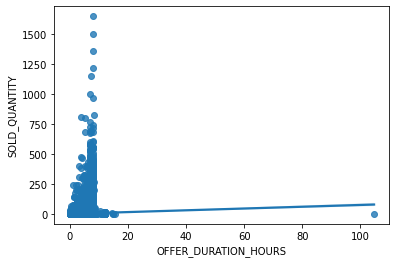

In [ ]:
sns.regplot(x="OFFER_DURATION_HOURS", y="SOLD_QUANTITY", data=working_df, x_jitter=.1, fit_reg = True)
working_df[['OFFER_DURATION_HOURS', 'SOLD_QUANTITY']].corr()

- Ninguna correlacion entre la duracion de la oferta (en horas) y la cantidad de unidades vendidas.

**Ventas por productos y categorias**

In [ ]:
top_sellers_dom = working_df[['SOLD_QUANTITY','DOM_DOMAIN_AGG1', 'DOMAIN_ID']].groupby(['DOM_DOMAIN_AGG1']).sum()
top_sellers_dom['PCTG'] = top_sellers_dom.SOLD_QUANTITY/top_sellers_dom.SOLD_QUANTITY.sum()
top_sellers_dom = top_sellers_dom.sort_values(by = 'SOLD_QUANTITY', ascending = False)
top_sellers_dom. head(10)

,SOLD_QUANTITY,PCTG
DOM_DOMAIN_AGG1,,
PHARMACEUTICS,147723.0,0.547751
BEAUTY EQUIPMENT,24323.0,0.090189
HOME&DECOR,18348.0,0.068034
COMPUTERS,12627.0,0.046820
APPAREL,7846.0,0.029093
APPAREL ACCESORIES,7654.0,0.028381
SPORTS,7628.0,0.028284
PERSONAL CARE,6160.0,0.022841
MOBILE,5752.0,0.021328


<BarContainer object of 22 artists>

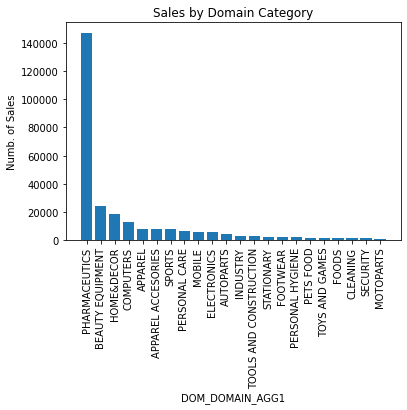

In [ ]:
plt.title("Sales by Domain Category")
plt.xlabel("DOM_DOMAIN_AGG1")
plt.ylabel("Numb. of Sales")
plt.xticks(rotation = 90)
plt.bar(top_sellers_dom.index[:22],top_sellers_dom.SOLD_QUANTITY[:22])        

- Los productos 'Farmaceuticos' fueron por mucho los mas vendidos durante el periodo, representando el 55% de todas las unidades vendidas!
- Si unimos la categoria de productos 'PHARMACEUTICS' a las de 'BEAUTY EQUIPMENT', 'HOME&DECOR'  y 'COMPUTERS', tenemos una verdadera distribucion de Pareto, en la cual apenas un 11% de las categorias comprenden aproximadamente el 80% de las unidades vendidas durante el periodo.

**Productos mas vendidos**

Cuales fueron los 20 productos mas vendidos en el periodo?

In [ ]:
top_sellers_prod = working_df[['SOLD_QUANTITY', 'DOMAIN_ID']].groupby(['DOMAIN_ID']).sum()
top_sellers_prod['PCTG_UNITS_SOLD'] = top_sellers_prod.SOLD_QUANTITY/top_sellers_prod.SOLD_QUANTITY.sum()
top_sellers_prod = top_sellers_prod.sort_values(by = 'SOLD_QUANTITY', ascending = False)
top_sellers_prod. head(10)

,SOLD_QUANTITY,PCTG
DOMAIN_ID,,
MLM-SURGICAL_AND_INDUSTRIAL_MASKS,141377.0,0.524220
MLM-DISPOSABLE_GLOVES,13477.0,0.049972
MLM-OXIMETERS,8632.0,0.032007
MLM-HEADPHONES,4721.0,0.017505
MLM-THERMOMETERS,3777.0,0.014005
MLM-LED_STRIPS,2015.0,0.007472
MLM-CELLPHONES,1843.0,0.006834
MLM-SPEAKERS,1755.0,0.006507
MLM-CHRISTMAS_LIGHTS,1691.0,0.006270


- Como era de esperar, entre los productos mas vendidos destacan los de la categoria farmaceutica; en especial las mascaras quirurgicas e industriales, las cuales representan por si solas mas del 50% de las ventas en el periodo (!), los guantes desechables (5%) y los oximetros (3%). (Por supuesto, las mascaras quirurgicas e industriales son tambien, por mucho, las mas ofertadas.)

- De los 10 productos mas ofertados en el periodo, solo tres entran en el top 10 de los mas vendidos. Estos son las mascaras quirurgicas e industriales, los auriculares, y los led strips. (Muy mal les fue a los relojes)

**Analisis de temporadas y fechas**

Ofertas mensuales

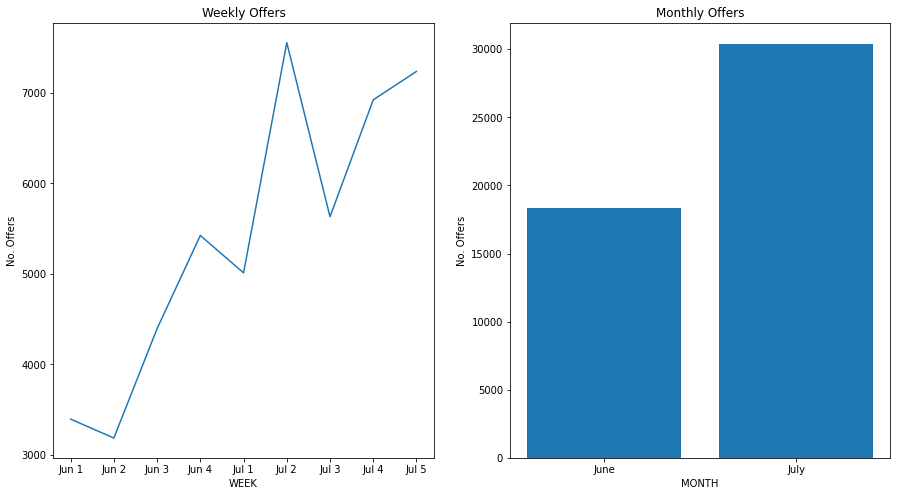

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
# plot weekly offers in the two months periods
weekly_offers = working_df[['WEEK','DOMAIN_ID']].groupby('WEEK').count()
ax1.set(
    title = "Weekly Offers",
    xlabel = "WEEK",
    ylabel = "No. Offers"
)
xticks = ['Jun 1','Jun 2', 'Jun 3', 'Jun 4', 'Jul 1', 'Jul 2', 'Jul 3', 'Jul 4', 'Jul 5']
ax1.plot(xticks, weekly_offers.DOMAIN_ID)

# plot offers by month
monthly_offers = working_df[['MONTH','DOMAIN_ID']].groupby('MONTH').count().sort_values(by = "DOMAIN_ID")
ax2.set(
    title = "Monthly Offers",
    xlabel = "MONTH",
    ylabel = "No. Offers"
)
ax2.bar(monthly_offers.index,monthly_offers.DOMAIN_ID) 
plt.show()

- A pesar de algunos altibajos, la tendencia en el numero de ofertas relampago publicadas durante el periodo, fue ascendente; con un pico notable en la segunda semana del mes de julio de 2021.
- Durante el mes de julio, hubo un crecimiento del 67% en la cantidad de ofertas, con respecto a las del mes de junio.

Veamos si las ventas se comportaron de manera similar....

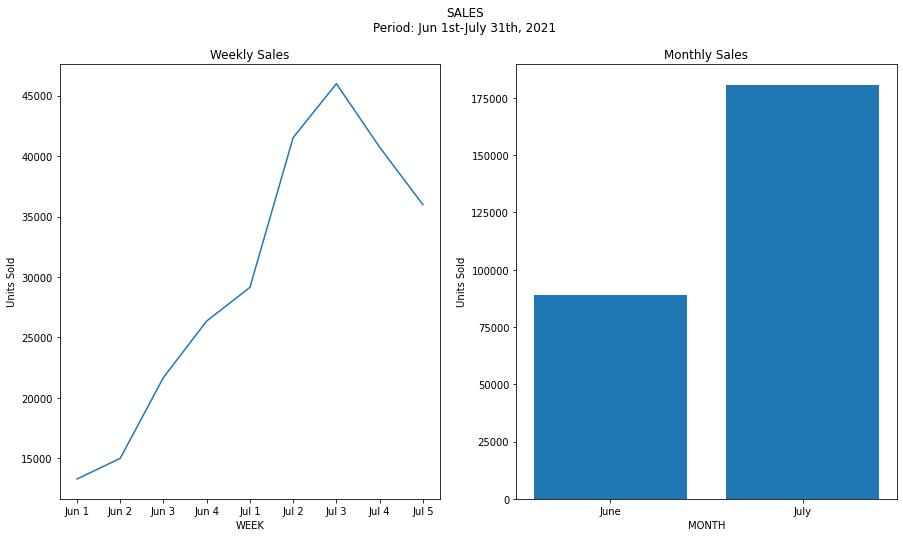

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('SALES\nPeriod: Jun 1st-July 31th, 2021')
# plot weekly sales in the two months periods
weekly_sales = working_df[['WEEK','SOLD_QUANTITY']].groupby('WEEK').sum()
ax1.set(
    title = "Weekly Sales",
    xlabel = "WEEK",
    ylabel = "Units Sold"
)
xticks = ['Jun 1','Jun 2', 'Jun 3', 'Jun 4', 'Jul 1', 'Jul 2', 'Jul 3', 'Jul 4', 'Jul 5']
ax1.plot(xticks, weekly_sales.SOLD_QUANTITY)

# plot sales by monthSOLD_QUANTITY
monthly_sales = working_df[['MONTH','SOLD_QUANTITY']].groupby('MONTH').sum().sort_values(by = "SOLD_QUANTITY")
ax2.set(
    title = "Monthly Sales",
    xlabel = "MONTH",
    ylabel = "Units Sold"
)
ax2.bar(monthly_sales.index,monthly_sales.SOLD_QUANTITY) 
plt.show()

- La cantidad de unidades de productos vendidas cayo consecutivamente durante las ultimas dos semanas de Julio, justo en en el mismo periodo que se registra un alza de la cantidad de ofertas publicadas.

- No obstante, la cantidad de unidades vendidas en el mes de julio fue mas de dos veces superior a la del mes anterior. 

**Ofertas y ventas por dias de la semana**

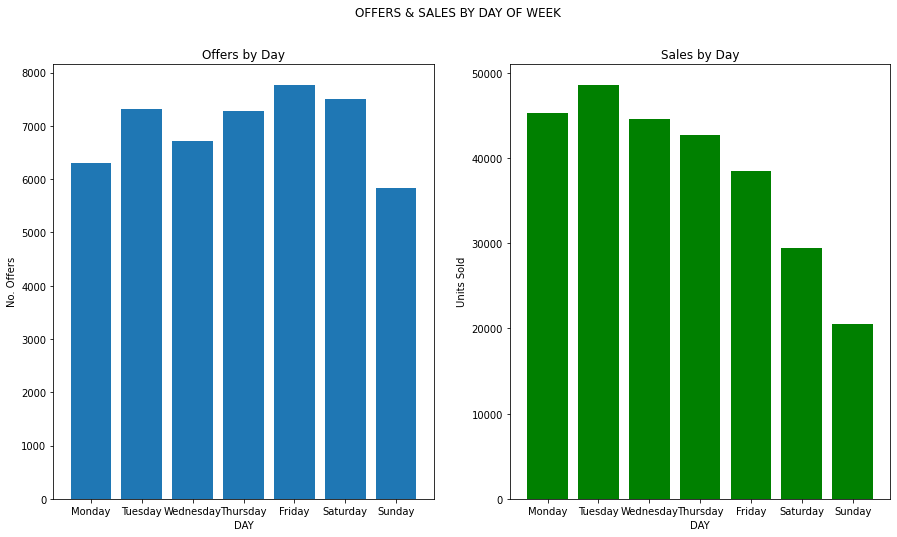

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle("OFFERS & SALES BY DAY OF WEEK")
# plot offers by day of the week
week_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
offers_by_diw = working_df[['DAY_IN_WEEK','DOMAIN_ID']].groupby('DAY_IN_WEEK').count()
ax1.set(
    title = "Offers by Day",
    xlabel = "DAY",
    ylabel = "No. Offers"
)
ax1.bar(offers_by_diw.index.map(week_mapping),offers_by_diw.DOMAIN_ID) 


# plot sales by day of the week
sales_by_diw = working_df[['DAY_IN_WEEK','SOLD_QUANTITY']].groupby('DAY_IN_WEEK').sum()
ax2.set(
    title = "Sales by Day",
    xlabel = "DAY",
    ylabel = "Units Sold"
)

ax2.bar(sales_by_diw.index.map(week_mapping),sales_by_diw.SOLD_QUANTITY, color = "g") 
plt.show()bar plotbar plot

- INTERESANTE: Mientras que las ofertas tendieron a ser mayores los jueves, viernes y sabados; el numero compras/unidades vendidas tendio a disminuir hacia el final de la semana (incluyendo viernes y sabados).

- El domingo no parece ser un buen dia para negocios.
